In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
torchvision.__version__

cuda:0


'0.16.0+cu118'

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:01<00:00, 94155031.64it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


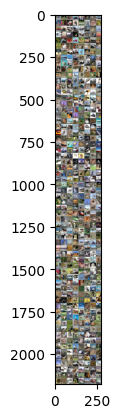

plane horse frog  plane dog   dog   plane car   deer  cat   dog   bird  car   ship  deer  frog  car   ship  truck ship  ship  truck dog   ship  plane truck car   bird  truck frog  bird  car   frog  horse car   plane frog  dog   plane deer  bird  dog   frog  dog   deer  dog   car   cat   deer  horse truck truck bird  deer  deer  frog  deer  ship  plane ship  horse cat   car   bird  horse cat   ship  horse cat   truck frog  ship  cat   dog   horse bird  cat   dog   frog  horse dog   bird  cat   plane frog  deer  frog  dog   dog   truck ship  frog  truck car   truck dog   dog   bird  horse truck truck horse dog   plane ship  frog  car   bird  plane bird  car   deer  horse bird  ship  truck bird  cat   ship  deer  cat   deer  frog  truck truck car   dog   deer  cat   horse car   cat   bird  truck truck truck bird  deer  cat   deer  deer  frog  truck ship  cat   horse plane plane deer  cat   dog   plane dog   truck cat   bird  bird  car   cat   ship  plane bird  horse plane plane ship  dog 

In [3]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Linear(256 * 4 * 4, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(1024, 52),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(52, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


net = Net()
net.to(device)


Net(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
softmax = nn.Softmax(dim=1)

In [ ]:
acc_tracker=[]
loss_tracker=[]
total_train = 0

for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    running_accuracy = 0.0
    batch_iteration = 0  # Iteration in batch

    for i, data in enumerate(trainloader, 0):
        net.to(device)
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        # calcuate loss
        loss = criterion(outputs, labels)

        # get probabilites for each label
        probabilities = softmax(outputs).cpu().detach().numpy()

        # get predicted labels
        predicted_labels = [np.argmax(i) for i in probabilities]
        predicted_labels = np.array(predicted_labels)

        correct = 0
        accuracy = 0

        ground_truth_labels = labels.cpu().detach().numpy()

        for pred ,gt in zip(predicted_labels,ground_truth_labels):

            if pred == gt:
                correct+=1

        accuracy = 100 * (correct/len(ground_truth_labels))

        # update weights
        loss.backward()
        optimizer.step()
        running_accuracy +=accuracy
        running_loss +=loss.item()
        batch_iteration +=1

    # get loss in current epoch
    train_loss = running_loss/batch_iteration
    train_accuracy = running_accuracy/batch_iteration
    print(f'Epoch {epoch} Training Loss: {train_loss} Accuracy: {train_accuracy}')
    loss_tracker.append(train_loss)
    acc_tracker.append(train_accuracy)

Epoch 0 Training Loss: 2.3059269335805155 Accuracy: 10.186809098639456
Epoch 1 Training Loss: 2.3052685333757985 Accuracy: 10.093233722060253
Epoch 2 Training Loss: 2.304686643639389 Accuracy: 9.930852921525753
Epoch 3 Training Loss: 2.30429656408271 Accuracy: 9.83205782312925
Epoch 4 Training Loss: 2.303876516770343 Accuracy: 10.1180985787172
Epoch 5 Training Loss: 2.3036424262183055 Accuracy: 10.083173894557822
Epoch 6 Training Loss: 2.3034374227329177 Accuracy: 10.203322400388727
Epoch 7 Training Loss: 2.3033680867175668 Accuracy: 9.99965834548105
Epoch 8 Training Loss: 2.3031863387750118 Accuracy: 9.737153790087463
Epoch 9 Training Loss: 2.3030118431363786 Accuracy: 10.069128097667638
Epoch 10 Training Loss: 2.3029546567371915 Accuracy: 10.005637299562682
Epoch 11 Training Loss: 2.3029117705870648 Accuracy: 10.06656568877551
Epoch 12 Training Loss: 2.302919694355556 Accuracy: 10.064003279883382
Epoch 13 Training Loss: 2.3029263554787147 Accuracy: 9.825983965014577
Epoch 14 Training

In [ ]:
PATH = './512_batch_SGD_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.to(device)

net.load_state_dict(torch.load(PATH))
# outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

In [ ]:
import csv

csv_filename = "SDG_training_log.csv"
epochlist= [i for i in range(1, epoch+1) ]
with open(csv_filename, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["nepochs", "accuracy", "loss"])
    csv_writer.writerows(zip(epochlist, acc_tracker, loss_tracker))

print(f"Logbook exported to {csv_filename}")

In [ ]:
# plot loss
plt.plot(np.arange(0,100), loss_tracker, label='Training loss')
plt.title('Loss')
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# plot accuracy
plt.plot(acc_tracker, label='Training accuracy', color='orange')
plt.title('Accuracy')
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()